# Pivot and Melt: Converting between Long and Wide Format

Two common data formats in data analysis are **wide** and **long** formats.

- **Wide Format**: Each variable is a column, making it more readable and compact.
- **Long Format**: Each observation is a row, with identifiers and values, which is often better for analysis.

Pandas provides powerful functions to convert between these formats: `melt()` for wide to long, and `pivot()` for long to wide.


In [53]:
import pandas as pd

In [54]:
# Example 1: Student Exam Scores (Simple and Intuitive)
# Wide format - easy to read, one row per student
wide_scores = pd.DataFrame(
    {
        "Student": ["Alice", "Bob", "Charlie", "Diana"],
        "Math": [85, 92, 78, 88],
        "English": [90, 88, 95, 80],
        "Science": [88, 85, 82, 92],
    }
)

display(wide_scores)

,Student,Math,English,Science
0,Alice,85,90,88
1,Bob,92,88,85
2,Charlie,78,95,82
3,Diana,88,80,92


In [55]:
# Convert to long format using melt

long_scores = wide_scores.melt(
    id_vars=["Student"],  # Keep Student as identifier
    var_name="Subject",  # Name of the new column with subject names
    value_name="Score",  # Name of the new column with scores
)

display(long_scores)

,Student,Subject,Score
0,Alice,Math,85
1,Bob,Math,92
2,Charlie,Math,78
3,Diana,Math,88
4,Alice,English,90
5,Bob,English,88
6,Charlie,English,95
7,Diana,English,80
8,Alice,Science,88
9,Bob,Science,85


In [56]:
# Convert back to wide format using pivot
pivoted_scores = long_scores.pivot(
    index="Student",  # Rows
    columns="Subject",  # Columns
    values="Score",  # Values to fill
)

display(pivoted_scores)

Subject,English,Math,Science
Student,,,
Alice,90,85,88
Bob,88,92,85
Charlie,95,78,82
Diana,80,88,92


,Subject,Score
0,English,88.25
1,Math,85.75
2,Science,86.75


Text(0.5, 1.0, 'Average Scores by Subject')

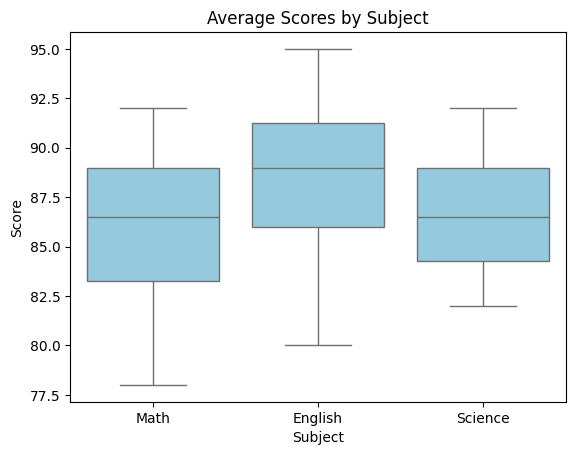

In [57]:
import seaborn as sns
# Why long format is useful: Easy aggregation and visualization

# Calculate average score per subject using groupby in pandas
average_scores = long_scores.groupby("Subject")["Score"].mean().reset_index()
display(average_scores)

# We use seaborn to create a boxplot of scores by subject. We will learn more about visualization later.
sns.boxplot(data=long_scores, x="Subject", y="Score", color="skyblue").set_title(
    "Average Scores by Subject"
)

### Example 1: Sales Data by Region and Month


In [58]:
sales_wide = pd.DataFrame(
    {
        "Region": ["North", "South", "East", "West"],
        "January": [15000, 12000, 18000, 14000],
        "February": [16000, 13000, 17500, 15000],
        "March": [18000, 14000, 19000, 16500],
    }
)
display(sales_wide)

# Convert to long format
sales_long = sales_wide.melt(id_vars=["Region"], var_name="Month", value_name="Sales")
display(sales_long)


# Convert back to wide format
sales_pivoted = sales_long.pivot(index="Region", columns="Month", values="Sales")
display(sales_pivoted)

,Region,January,February,March
0,North,15000,16000,18000
1,South,12000,13000,14000
2,East,18000,17500,19000
3,West,14000,15000,16500


,Region,Month,Sales
0,North,January,15000
1,South,January,12000
2,East,January,18000
3,West,January,14000
4,North,February,16000
5,South,February,13000
6,East,February,17500
7,West,February,15000
8,North,March,18000
9,South,March,14000


Month,February,January,March
Region,,,
East,17500,18000,19000
North,16000,15000,18000
South,13000,12000,14000
West,15000,14000,16500


### Example 3: Product Ratings by Customer


In [59]:
ratings_data = {
    "Customer": {
        0: "John",
        1: "Sarah",
        2: "Mike",
        3: "John",
        4: "Sarah",
        5: "Mike",
        6: "John",
        7: "Sarah",
        8: "Mike",
    },
    "Product": {
        0: "Product_A",
        1: "Product_A",
        2: "Product_A",
        3: "Product_B",
        4: "Product_B",
        5: "Product_B",
        6: "Product_C",
        7: "Product_C",
        8: "Product_C",
    },
    "Rating": {0: 5, 1: 4, 2: 5, 3: 3, 4: 5, 5: 4, 6: 4, 7: 4, 8: 3},
}
ratings_long = pd.DataFrame(ratings_data)
display(ratings_long)

# Create wide format
ratings_wide = ratings_long.pivot(index="Customer", columns="Product", values="Rating")
display(ratings_wide)

# Convert back to long format
ratings_wide_reset = ratings_wide.reset_index(drop=False) # Reset index to turn 'Customer' back into a column
ratings_long_converted = ratings_wide_reset.melt(
    id_vars=["Customer"], var_name="Product", value_name="Rating"
)
display(ratings_long_converted)

,Customer,Product,Rating
0,John,Product_A,5
1,Sarah,Product_A,4
2,Mike,Product_A,5
3,John,Product_B,3
4,Sarah,Product_B,5
5,Mike,Product_B,4
6,John,Product_C,4
7,Sarah,Product_C,4
8,Mike,Product_C,3


Product,Product_A,Product_B,Product_C
Customer,,,
John,5,3,4
Mike,5,4,3
Sarah,4,5,4


,Customer,Product,Rating
0,John,Product_A,5
1,Mike,Product_A,5
2,Sarah,Product_A,4
3,John,Product_B,3
4,Mike,Product_B,4
5,Sarah,Product_B,5
6,John,Product_C,4
7,Mike,Product_C,3
8,Sarah,Product_C,4


### Using Aggregation with Pivot